In [2]:
from classes.generator import *
from hardware_control.wx_programs import *
import numpy as np

In [19]:

class Pulse:
    """
    DESCRIPTION: an object to contain all pulse parameters.
            If using SSM, self.ssm_bool= True
    PARAMETERS:
        (base): duration, start (time), amplitude,
        (if ssm_bool): ssm_freq (GHz), phase
    FUNCTIONS:
        make(): create short copy of pulse
        show(): graph output
        copy(): deep copy, I hope...
        NOTES:
                This does not include difference b/t cos/sin because they can be included in phase
    """

    def __init__(
        self, duration, start, amplitude, ssm_freq=None, phase=0, gaussian_bool=False
    ):
        self.duration = int(duration)
        self.start = int(start)
        self.amplitude = amplitude
        if ssm_freq is not None:
            self.ssm_bool = True
            self.ssm_freq = ssm_freq
            self.phase = phase
        else:
            self.ssm_bool = False
        self.gaussian_bool = gaussian_bool
        self.waveform = self.make()  # Generate the waveform upon initialization

    def make(self):
        new_array = np.zeros(self.duration)
        if self.ssm_bool:
            self.gen_pulse(new_array, self)
        else:
            self.gen_pulse(new_array, self)

        return new_array

    def gen_pulse(self, dest_wave, pulse):
        """
        Placeholder function to generate a pulse waveform.
        You can replace this with your actual pulse generation logic.
        """
        if pulse.ssm_bool:
            # Example: Generate a sinusoidal waveform if SSM is enabled
            t = np.arange(pulse.duration)
            dest_wave[:] = pulse.amplitude * np.sin(2 * np.pi * pulse.ssm_freq * t + pulse.phase)
        else:
            # Example: Generate a simple square pulse if SSM is disabled
            dest_wave[:] = pulse.amplitude

    def show(self):
        plt.plot(np.arange(self.start, self.start + self.duration), self.waveform)
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.title('Pulse Waveform')
        plt.show()

    def copy(self):
        # Create a deep copy of the Pulse object
        return Pulse(
            self.duration,
            self.start,
            self.amplitude,
            self.ssm_freq if self.ssm_bool else None,
            self.phase if self.ssm_bool else 0,
            self.gaussian_bool,
        )
    def toString(self):
        outString = "Pulse of {0} [amp] from {1}+{2}".format(
            self.amplitude, self.start, self.duration
        )
        if self.ssm_bool:
            outString += " SSM @ {0} MHz with phase={1}".format(
                self.ssm_freq * 1000, self.phase
            )
        return outString

In [20]:
sweep_time =310
totlength = sweep_time + 4000  # Extra buffer time
file_length = 10000 * (int(np.ceil(totlength / 10000)) + 1)
readout_dur = 4000
spec_amp = 1.9
ssm_para =-.0192
parametric_drive = Pulse(
        start=file_length - readout_dur,
        duration=sweep_time,  # Initially zero, swept in time
        amplitude=spec_amp,
        ssm_freq=ssm_para,
        phase=0,)

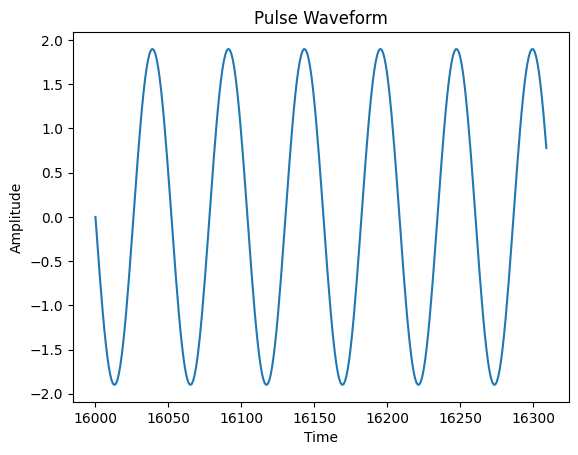

In [21]:
parametric_drive.show()

In [23]:
def func_guess(x, amp,omega, decay, offset):
    return amp*np.exp(-0.3*x)*np.sin(omega *x ) + np.exp(-decay * x) + offset 

(-1.0, 3.0)

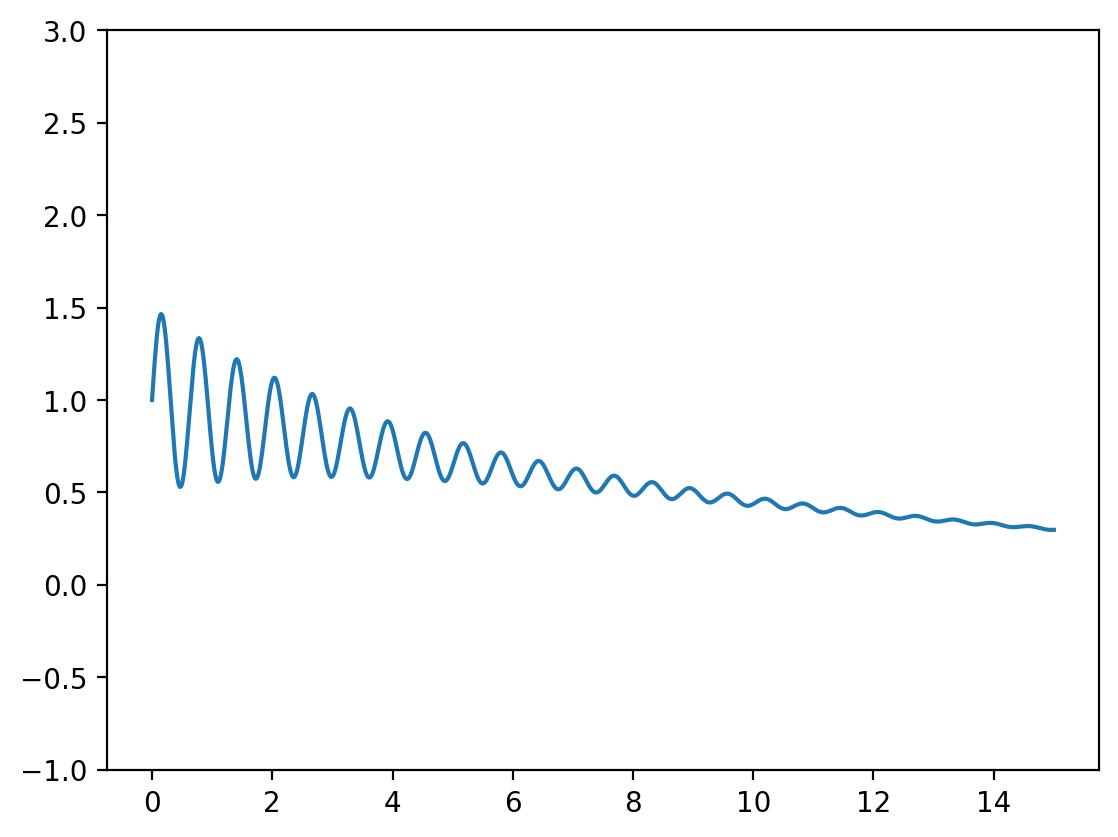

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi  = 200)
x_vals = np.linspace(0, 15, 1000)
plt.plot(x_vals, func_guess(x_vals,0.5, 10.0, 0.08, 0.0), label='Guess')
plt.ylim(-1,3)